In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

2023-06-15 15:01:24.849117: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 15:01:24.899647: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 15:01:28.382774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/matwey/sci/hse/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
split = ['train[:75%]', 'train[75%:]']
ds_train, ds_test = tfds.load('cats_vs_dogs', split=split, shuffle_files=True)

2023-06-15 15:01:33.118898: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...:   8%|██▎                         | 66/786 [00:06<00:59, 12.18 MiB/s]


Dl Completed...:   0%|                                  | 0/1 [00:11<?, ? url/s]


Dl Completed...:   0%|                                  | 0/1 [00:16<?, ? url/s]


Dl Completed...:   0%|                                  | 0/1 [00:21<?, ? url/s]


Dl Completed...:   0%|                                  | 0/1 [00:26<?, ? url/s]


Dl Size...:  53%|██████████████▏            | 414/786 [00:34<00:23, 16.15 MiB/s]


Dl Size...:  62%|████████████████▋          | 485/786 [00:39<00:15, 19.98 MiB/s]


Dl Completed...:   0%|                                  | 0/1 [00:44<?, ? url/s]


Dl Size...:  79%|█████████████████████▎     | 620/786 [00:51<00:19,  8.30 MiB/s]


Dl Completed...:   0%|                                  | 0/1 [00:56<?, ? url/s]


Dl Completed...:   0%|                                  | 0/1 [01:01<?, ? url/s]


Generating splits...:   0%|                          | 0/1 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:00,  5.15 examples/s]
Generating train examples...: 299 examples [00:00, 1265.56 examples/s]
Generating train examples...: 606 examples [00:00, 1944.96 examples/s]
Generating train examples...: 916 examples [00:00, 2347.55 examples/s]
Generating train examples...: 1232 examples [00:00, 2612.32 examples/s]
Generating train examples...: 1547 examples [00:00, 2784.89 examples/s]
Generating train examples...: 1864 examples [00:00, 2903.70 examples/s]
Generating train examples...: 2168 examples [00:00, 2942.90 examples/s]
Generating train examples...: 2479 examples [00:00, 2993.92 examples/s]
Generating train examples...: 2785 examples [00:01, 3012.28 examples/s]
Generating train examples...: 3107 examples [00:01, 3072.59 examples/s]
Generating train examples...: 3417 examples [00:01, 3078.89 examples/s]


Generating train examples...: 19311 examples [00:06, 2955.71 examples/s]
Generating train examples...: 19613 examples [00:06, 2974.80 examples/s]
Generating train examples...: 19911 examples [00:06, 2972.44 examples/s]
Generating train examples...: 20209 examples [00:06, 2960.39 examples/s]
Generating train examples...: 20506 examples [00:06, 2954.23 examples/s]
Generating train examples...: 20816 examples [00:07, 2995.40 examples/s]
Generating train examples...: 21116 examples [00:07, 2955.45 examples/s]
Generating train examples...: 21415 examples [00:07, 2963.22 examples/s]
Generating train examples...: 21712 examples [00:07, 2937.17 examples/s]
Generating train examples...: 22006 examples [00:07, 2908.29 examples/s]
Generating train examples...: 22301 examples [00:07, 2920.17 examples/s]
Generating train examples...: 22605 examples [00:07, 2953.86 examples/s]
Generating train examples...: 22901 examples [00:07, 2949.64 examples/s]
Generating train examples...: 23202 examples [00:07

Dataset cats_vs_dogs downloaded and prepared to /home/matwey/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
resized_ds = ds_test.map(lambda x: (tf.image.resize(x["image"], [224, 224]), x["label"]))

2023-06-15 15:02:47.882983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-06-15 15:02:47.883556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]


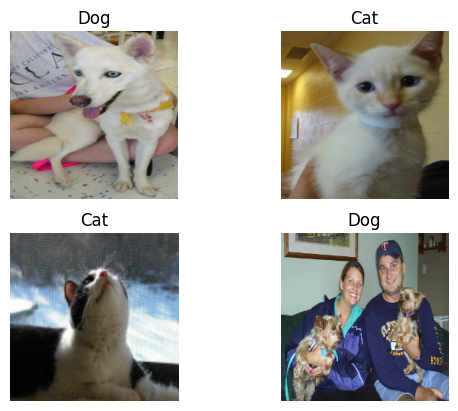

In [4]:
samples = tfds.as_numpy(resized_ds.take(4))

fig, axs = plt.subplots(2, 2)
for i, s in enumerate(samples):
    ax = axs[i // 2, i % 2]
    ax.imshow(s[0].astype(np.uint8))
    ax.axis('Off')
    ax.set_title("{}".format("Dog" if s[1] else "Cat"))

In [5]:
processed_train = ds_train.map(lambda x: (
    tf.keras.applications.resnet.preprocess_input(tf.image.resize(x["image"], [224, 224])),
    x["label"]
    )).batch(64)
processed_test = ds_test.map(lambda x: (
    tf.keras.applications.resnet.preprocess_input(tf.image.resize(x["image"], [224, 224])),
    x["label"]
    )).batch(64)

## Наивная модель

In [6]:
INPUT_SHAPE = (224, 224, 3)
HIDDEN1_CH = 16
HIDDEN2_CH = 32
HIDDEN3_CH = 64
HIDDEN4_CH = 128
HIDDEN5_CH = 128
OUTPUT_DIM = 1

inputs = tf.keras.Input(shape=INPUT_SHAPE, name='input')
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(HIDDEN1_CH, (7, 7), strides=(2, 2), activation="relu"),
    tf.keras.layers.Conv2D(HIDDEN2_CH, (7, 7), strides=(2, 2), activation="relu"),
    tf.keras.layers.Conv2D(HIDDEN3_CH, (7, 7), strides=(2, 2), activation="relu"),
    tf.keras.layers.Conv2D(HIDDEN4_CH, (7, 7), strides=(2, 2), activation="relu"),
    tf.keras.layers.Conv2D(HIDDEN5_CH, (9, 9), strides=(2, 2), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="sigmoid"),
])
outputs = cnn(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 109, 109, 16)      2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 32)        25120     
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        100416    
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         401536    
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 128)         1327232   
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [7]:
learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy', metrics=['accuracy'])

fit = model.fit(processed_train, epochs=5, validation_data=processed_test)

Epoch 1/5


2023-06-15 15:02:48.666509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]
2023-06-15 15:02:48.667106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]


 81/273 [=======>......................] - ETA: 3:52 - loss: 1.0236 - accuracy: 0.5642

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 3:32 - loss: 0.9564 - accuracy: 0.5723

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


136/273 [=============>................] - ETA: 2:48 - loss: 0.8712 - accuracy: 0.5852

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 42s - loss: 0.7657 - accuracy: 0.6106

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 35s - loss: 0.7623 - accuracy: 0.6117

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 28s - loss: 0.7584 - accuracy: 0.6127

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 11s - loss: 0.7506 - accuracy: 0.6144

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 7s - loss: 0.7491 - accuracy: 0.6147

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.6162

2023-06-15 15:08:26.117814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]
2023-06-15 15:08:26.118366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 362s 1s/step - loss: 0.7458 - accuracy: 0.6162 - val_loss: 0.6015 - val_accuracy: 0.6776
Epoch 2/5
 81/273 [=======>......................] - ETA: 4:02 - loss: 0.5905 - accuracy: 0.6806

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


100/273 [=========>....................] - ETA: 3:38 - loss: 0.5890 - accuracy: 0.6842

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


134/273 [=============>................] - ETA: 2:56 - loss: 0.5820 - accuracy: 0.6910

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 42s - loss: 0.5654 - accuracy: 0.7070

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


245/273 [=========================>....] - ETA: 35s - loss: 0.5650 - accuracy: 0.7070

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


251/273 [==========================>...] - ETA: 27s - loss: 0.5640 - accuracy: 0.7079

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


265/273 [============================>.] - ETA: 9s - loss: 0.5620 - accuracy: 0.7094 

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


268/273 [============================>.] - ETA: 6s - loss: 0.5614 - accuracy: 0.7101

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.7112

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 364s 1s/step - loss: 0.5603 - accuracy: 0.7112 - val_loss: 0.5692 - val_accuracy: 0.7063
Epoch 3/5
 81/273 [=======>......................] - ETA: 3:45 - loss: 0.4890 - accuracy: 0.7546

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 3:24 - loss: 0.4911 - accuracy: 0.7543

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


136/273 [=============>................] - ETA: 2:41 - loss: 0.4831 - accuracy: 0.7637

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 40s - loss: 0.4676 - accuracy: 0.7749

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 34s - loss: 0.4665 - accuracy: 0.7754

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 27s - loss: 0.4644 - accuracy: 0.7769

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 10s - loss: 0.4627 - accuracy: 0.7777

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 7s - loss: 0.4630 - accuracy: 0.7773

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7781

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 347s 1s/step - loss: 0.4615 - accuracy: 0.7781 - val_loss: 0.5352 - val_accuracy: 0.7381
Epoch 4/5
 82/273 [========>.....................] - ETA: 3:58 - loss: 0.3733 - accuracy: 0.8325

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 3:35 - loss: 0.3725 - accuracy: 0.8332

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


135/273 [=============>................] - ETA: 2:51 - loss: 0.3694 - accuracy: 0.8363

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 43s - loss: 0.3489 - accuracy: 0.8487

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


245/273 [=========================>....] - ETA: 35s - loss: 0.3481 - accuracy: 0.8487

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 29s - loss: 0.3462 - accuracy: 0.8497

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 11s - loss: 0.3436 - accuracy: 0.8505

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 7s - loss: 0.3439 - accuracy: 0.8499

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.3421 - accuracy: 0.8507

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 375s 1s/step - loss: 0.3421 - accuracy: 0.8507 - val_loss: 0.5567 - val_accuracy: 0.7333
Epoch 5/5
 82/273 [========>.....................] - ETA: 3:57 - loss: 0.2534 - accuracy: 0.9042

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


100/273 [=========>....................] - ETA: 3:41 - loss: 0.2511 - accuracy: 0.9047

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


135/273 [=============>................] - ETA: 2:58 - loss: 0.2649 - accuracy: 0.8939

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 43s - loss: 0.2539 - accuracy: 0.8992

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


245/273 [=========================>....] - ETA: 35s - loss: 0.2540 - accuracy: 0.8991

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 29s - loss: 0.2531 - accuracy: 0.8996

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 11s - loss: 0.2542 - accuracy: 0.8989

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 7s - loss: 0.2541 - accuracy: 0.8989

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.8987

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 374s 1s/step - loss: 0.2549 - accuracy: 0.8987 - val_loss: 0.7017 - val_accuracy: 0.6714


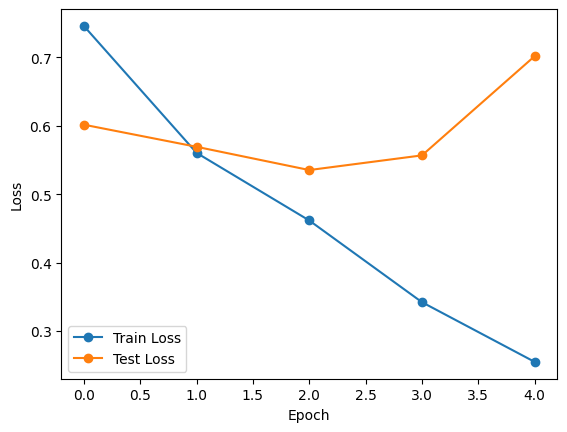

In [8]:
plt.plot(fit.history['loss'], '-o', label="Train Loss")
plt.plot(fit.history['val_loss'], '-o', label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Перенос обучения

In [9]:
# Create base model
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
# Freeze base model
base_model.trainable = False

HIDDEN_DIM = 128
OUTPUT_DIM = 1

new_top = tf.keras.Sequential(layers = [
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(HIDDEN_DIM, activation="sigmoid"),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="sigmoid"),
], name="new_top")

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
outputs = new_top(x)

model = tf.keras.Model(inputs, outputs)

print(model.summary())

94765736/94765736 [==============================] - 10s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 new_top (Sequential)        (None, 1)                 262401    
                                                                 
Total params: 23,850,113
Trainable params: 262,401
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [10]:
learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy', metrics=['accuracy'])

fit = model.fit(processed_train, epochs=5, validation_data=processed_test)

Epoch 1/5
 81/273 [=======>......................] - ETA: 16:27 - loss: 0.2598 - accuracy: 0.9477

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 15:02 - loss: 0.2312 - accuracy: 0.9544

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


136/273 [=============>................] - ETA: 11:59 - loss: 0.1942 - accuracy: 0.9612

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 2:59 - loss: 0.1405 - accuracy: 0.9715

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 2:33 - loss: 0.1387 - accuracy: 0.9718

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


251/273 [==========================>...] - ETA: 1:56 - loss: 0.1362 - accuracy: 0.9722

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 47s - loss: 0.1319 - accuracy: 0.9733

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 31s - loss: 0.1311 - accuracy: 0.9734

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.1293 - accuracy: 0.9737

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 1922s 7s/step - loss: 0.1293 - accuracy: 0.9737 - val_loss: 0.0527 - val_accuracy: 0.9869
Epoch 2/5
 81/273 [=======>......................] - ETA: 16:08 - loss: 0.0468 - accuracy: 0.9890

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 14:43 - loss: 0.0457 - accuracy: 0.9897

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


136/273 [=============>................] - ETA: 12:05 - loss: 0.0469 - accuracy: 0.9885

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 3:06 - loss: 0.0444 - accuracy: 0.9886

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 2:39 - loss: 0.0441 - accuracy: 0.9888

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 2:06 - loss: 0.0439 - accuracy: 0.9888

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 49s - loss: 0.0431 - accuracy: 0.9892

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 32s - loss: 0.0431 - accuracy: 0.9891

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9892

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 1972s 7s/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 3/5
 81/273 [=======>......................] - ETA: 16:41 - loss: 0.0326 - accuracy: 0.9923

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


100/273 [=========>....................] - ETA: 15:04 - loss: 0.0328 - accuracy: 0.9923

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


135/273 [=============>................] - ETA: 12:00 - loss: 0.0345 - accuracy: 0.9910

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 2:58 - loss: 0.0337 - accuracy: 0.9906

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


245/273 [=========================>....] - ETA: 2:26 - loss: 0.0336 - accuracy: 0.9906

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


250/273 [==========================>...] - ETA: 2:00 - loss: 0.0334 - accuracy: 0.9907

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


264/273 [============================>.] - ETA: 47s - loss: 0.0328 - accuracy: 0.9909

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


267/273 [============================>.] - ETA: 31s - loss: 0.0329 - accuracy: 0.9908

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9910

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 1880s 7s/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 4/5
 81/273 [=======>......................] - ETA: 15:53 - loss: 0.0266 - accuracy: 0.9936

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 14:23 - loss: 0.0265 - accuracy: 0.9937

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


135/273 [=============>................] - ETA: 11:25 - loss: 0.0291 - accuracy: 0.9924

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 2:49 - loss: 0.0286 - accuracy: 0.9916

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 2:24 - loss: 0.0285 - accuracy: 0.9916

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


251/273 [==========================>...] - ETA: 1:49 - loss: 0.0283 - accuracy: 0.9917

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


265/273 [============================>.] - ETA: 40s - loss: 0.0278 - accuracy: 0.9917

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


268/273 [============================>.] - ETA: 25s - loss: 0.0278 - accuracy: 0.9918

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9919

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 1841s 7s/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9905
Epoch 5/5
 81/273 [=======>......................] - ETA: 16:56 - loss: 0.0229 - accuracy: 0.9940

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 99/273 [=========>....................] - ETA: 15:22 - loss: 0.0230 - accuracy: 0.9940

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


136/273 [=============>................] - ETA: 11:58 - loss: 0.0255 - accuracy: 0.9929

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


239/273 [=========================>....] - ETA: 2:59 - loss: 0.0253 - accuracy: 0.9925

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


244/273 [=========================>....] - ETA: 2:33 - loss: 0.0251 - accuracy: 0.9925

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


251/273 [==========================>...] - ETA: 1:56 - loss: 0.0249 - accuracy: 0.9925

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


265/273 [============================>.] - ETA: 42s - loss: 0.0245 - accuracy: 0.9927

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


268/273 [============================>.] - ETA: 26s - loss: 0.0245 - accuracy: 0.9927

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


273/273 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9928

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


273/273 [==============================] - 1913s 7s/step - loss: 0.0243 - accuracy: 0.9928 - val_loss: 0.0288 - val_accuracy: 0.9902


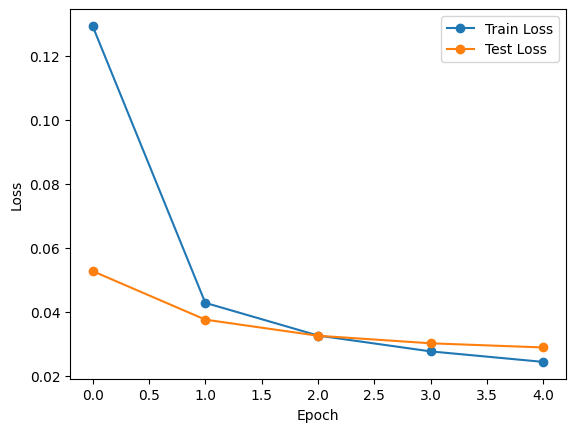

In [11]:
plt.plot(fit.history['loss'], '-o', label="Train Loss")
plt.plot(fit.history['val_loss'], '-o', label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

2023-06-15 18:13:34.529577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-06-15 18:13:34.530148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


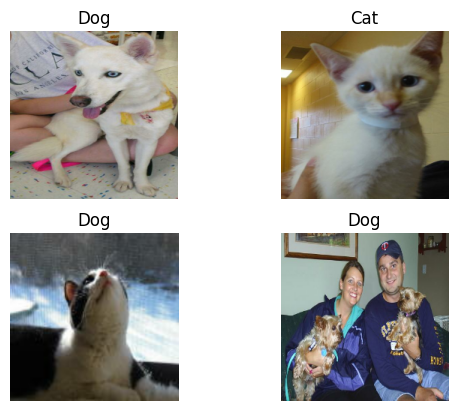

In [12]:
samples = tfds.as_numpy(resized_ds.take(4))

fig, axs = plt.subplots(2, 2)
for i, s in enumerate(samples):
    d = tf.expand_dims(tf.keras.applications.resnet.preprocess_input(tf.image.resize(s[0], [224, 224])), 0)
    p = model.predict(d, verbose=False)[0,0]
    ax = axs[i // 2, i % 2]
    ax.imshow(s[0].astype(np.uint8))
    ax.axis('Off')
    ax.set_title("{}".format("Dog" if p > 0.5 else "Cat"))

In [14]:
import sklearn.metrics

scores = []
labels = []
for x in processed_test.take(-1):
    scores.append(model.predict(x[0], verbose=False))
    labels.append(x[1].numpy())

scores = np.concatenate(scores)
labels = np.concatenate(labels)

fpr, tpr, _ = sklearn.metrics.roc_curve(labels, scores)
roc = {"tpr": tpr, "fpr": fpr}
auc = sklearn.metrics.roc_auc_score(labels, scores)

2023-06-15 18:13:54.084577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
2023-06-15 18:13:54.085209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


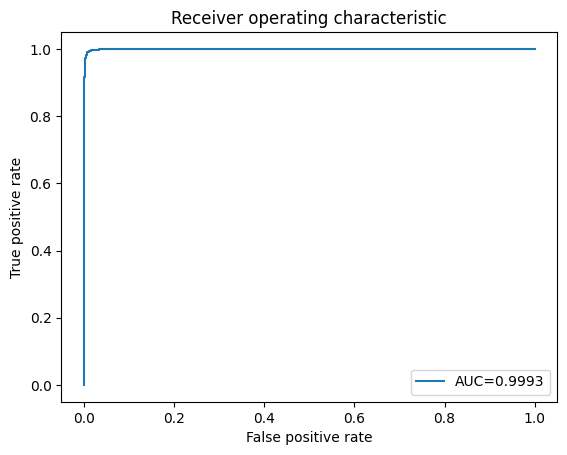

In [15]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(roc['fpr'], roc['tpr'], label='AUC={:.4f}'.format(auc))
_ = plt.legend(loc='lower right')

In [18]:
ds_train, ds_test = tfds.load('caltech_birds2011', split=["train", "test"], shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████| 1/1 [00:00<00:00, 93.52 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                  | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 100%|█████████████████████████| 1/1 [00:00<00:00, 103.99 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                              | 0/1150585339 [00:00<?, ? MiB/s]

Dl Size...: 100%|████| 1150585339/1150585339 [00:00<00:00, 59450627529.52 MiB/s]

Dl Size...: 100%|████| 1150585339/1150585339 [00:00<00:00, 48325252493.01 MiB/s]

Dl Size...: 100%|████| 1150585339/1150585339 [00:00<00:00, 42216956135.04 MiB/s]

Dl Size...:  97%|███▊| 1150585339/1189858222 [00:00<00:00, 34340254815.34 MiB/s]

Dl Size...: 100%|████| 1189858222/1189858222 [00:00<00:00, 30927951884.68 MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Generating splits...:   0%|

Generating train examples...: 2132 examples [00:14, 257.22 examples/s]
Generating train examples...: 2161 examples [00:14, 264.34 examples/s]
Generating train examples...: 2188 examples [00:14, 249.82 examples/s]
Generating train examples...: 2214 examples [00:14, 243.92 examples/s]
Generating train examples...: 2239 examples [00:15, 243.50 examples/s]
Generating train examples...: 2264 examples [00:15, 242.74 examples/s]
Generating train examples...: 2289 examples [00:15, 238.47 examples/s]
Generating train examples...: 2313 examples [00:15, 236.85 examples/s]
Generating train examples...: 2341 examples [00:15, 244.21 examples/s]
Generating train examples...: 2368 examples [00:15, 250.66 examples/s]
Generating train examples...: 2394 examples [00:15, 246.92 examples/s]
Generating train examples...: 2419 examples [00:15, 243.29 examples/s]
Generating train examples...: 2444 examples [00:15, 240.81 examples/s]
Generating train examples...: 2469 examples [00:16, 242.71 examples/s]
Genera

Generating train examples...: 4940 examples [00:26, 254.41 examples/s]
Generating train examples...: 4967 examples [00:26, 258.10 examples/s]
Generating train examples...: 4995 examples [00:26, 261.98 examples/s]
Generating train examples...: 5022 examples [00:26, 261.25 examples/s]
Generating train examples...: 5049 examples [00:26, 255.67 examples/s]
Generating train examples...: 5075 examples [00:26, 249.75 examples/s]
Generating train examples...: 5101 examples [00:26, 248.54 examples/s]
Generating train examples...: 5127 examples [00:27, 243.27 examples/s]
Generating train examples...: 5153 examples [00:27, 247.85 examples/s]
Generating train examples...: 5178 examples [00:27, 246.89 examples/s]
Generating train examples...: 5203 examples [00:27, 245.38 examples/s]
Generating train examples...: 5228 examples [00:27, 239.12 examples/s]
Generating train examples...: 5252 examples [00:27, 237.15 examples/s]
Generating train examples...: 5277 examples [00:27, 237.73 examples/s]
Genera

Generating test examples...: 1578 examples [00:12, 245.95 examples/s]
Generating test examples...: 1603 examples [00:12, 243.93 examples/s]
Generating test examples...: 1629 examples [00:12, 247.67 examples/s]
Generating test examples...: 1656 examples [00:12, 252.11 examples/s]
Generating test examples...: 1682 examples [00:12, 248.77 examples/s]
Generating test examples...: 1707 examples [00:12, 245.84 examples/s]
Generating test examples...: 1732 examples [00:12, 246.99 examples/s]
Generating test examples...: 1757 examples [00:13, 246.48 examples/s]
Generating test examples...: 1783 examples [00:13, 248.48 examples/s]
Generating test examples...: 1808 examples [00:13, 247.16 examples/s]
Generating test examples...: 1836 examples [00:13, 254.05 examples/s]
Generating test examples...: 1862 examples [00:13, 252.83 examples/s]
Generating test examples...: 1888 examples [00:13, 249.56 examples/s]
Generating test examples...: 1915 examples [00:13, 252.79 examples/s]
Generating test exam

Generating test examples...: 4518 examples [00:23, 257.35 examples/s]
Generating test examples...: 4544 examples [00:24, 257.74 examples/s]
Generating test examples...: 4570 examples [00:24, 256.11 examples/s]
Generating test examples...: 4596 examples [00:24, 253.11 examples/s]
Generating test examples...: 4622 examples [00:24, 250.69 examples/s]
Generating test examples...: 4648 examples [00:24, 250.99 examples/s]
Generating test examples...: 4675 examples [00:24, 249.70 examples/s]
Generating test examples...: 4702 examples [00:24, 252.83 examples/s]
Generating test examples...: 4732 examples [00:24, 263.14 examples/s]
Generating test examples...: 4759 examples [00:24, 256.40 examples/s]
Generating test examples...: 4786 examples [00:25, 259.83 examples/s]
Generating test examples...: 4813 examples [00:25, 259.80 examples/s]
Generating test examples...: 4840 examples [00:25, 257.85 examples/s]
Generating test examples...: 4866 examples [00:25, 252.74 examples/s]
Generating test exam

Dataset caltech_birds2011 downloaded and prepared to /home/matwey/tensorflow_datasets/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.


In [22]:
resized_ds = ds_test.map(lambda x: (tf.image.resize(x["image"], [224, 224]), x["label_name"]))

2023-06-15 18:30:51.308915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]
2023-06-15 18:30:51.309490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]


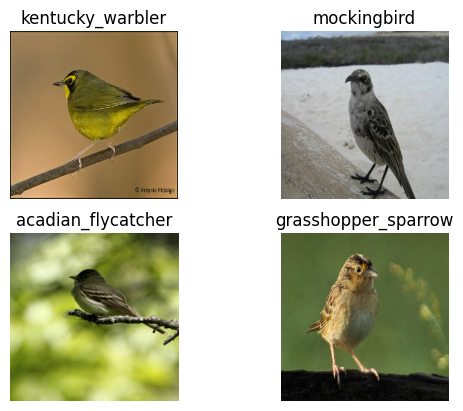

In [23]:
samples = tfds.as_numpy(resized_ds.take(4))

fig, axs = plt.subplots(2, 2)
for i, s in enumerate(samples):
    ax = axs[i // 2, i % 2]
    ax.imshow(s[0].astype(np.uint8))
    ax.axis('Off')
    ax.set_title("{}".format(s[1].decode("ascii")))

In [24]:
processed_train = ds_train.map(lambda x: (
    tf.keras.applications.resnet.preprocess_input(tf.image.resize(x["image"], [224, 224])),
    tf.one_hot(x["label"], 200)
    )).batch(64)
processed_test = ds_test.map(lambda x: (
    tf.keras.applications.resnet.preprocess_input(tf.image.resize(x["image"], [224, 224])),
    tf.one_hot(x["label"], 200)
    )).batch(64)

In [25]:
# Create base model
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
# Freeze base model
base_model.trainable = False

HIDDEN_DIM = 256
OUTPUT_DIM = 200

new_top = tf.keras.Sequential(layers = [
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(HIDDEN_DIM, activation="sigmoid"),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="softmax"),
], name="new_top")

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
outputs = new_top(x)

model = tf.keras.Model(inputs, outputs)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 new_top (Sequential)        (None, 200)               575944    
                                                                 
Total params: 24,163,656
Trainable params: 575,944
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [27]:
learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy', metrics=['accuracy'])

fit = model.fit(processed_train, epochs=5, validation_data=processed_test)

Epoch 1/5
94/94 [==============================] - ETA: 0s - loss: 5.2813 - accuracy: 0.0157

2023-06-15 18:40:50.277535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]
2023-06-15 18:40:50.278105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [8]
	 [[{{node Placeholder/_3}}]]


94/94 [==============================] - 962s 10s/step - loss: 5.2813 - accuracy: 0.0157 - val_loss: 5.1262 - val_accuracy: 0.0456
Epoch 2/5
94/94 [==============================] - 966s 10s/step - loss: 5.0141 - accuracy: 0.0821 - val_loss: 4.9210 - val_accuracy: 0.1212
Epoch 3/5
94/94 [==============================] - 1036s 11s/step - loss: 4.7829 - accuracy: 0.1867 - val_loss: 4.7206 - val_accuracy: 0.1867
Epoch 4/5
94/94 [==============================] - 1016s 11s/step - loss: 4.5637 - accuracy: 0.2718 - val_loss: 4.5350 - val_accuracy: 0.2430
Epoch 5/5
94/94 [==============================] - 1034s 11s/step - loss: 4.3623 - accuracy: 0.3453 - val_loss: 4.3644 - val_accuracy: 0.2858


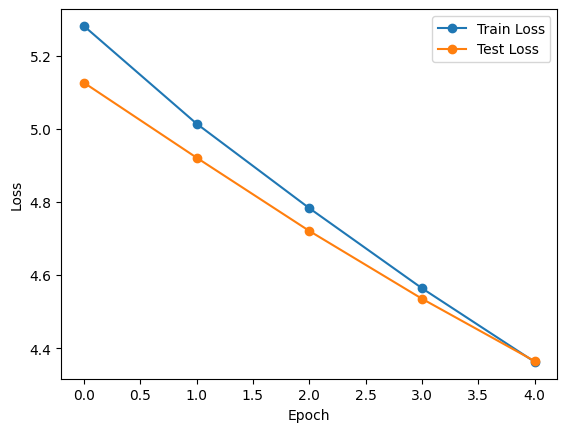

In [28]:
plt.plot(fit.history['loss'], '-o', label="Train Loss")
plt.plot(fit.history['val_loss'], '-o', label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()